# Exploratorio

[Ver proyecto](/home/gera/Documentos/Proyectos/portfolio/credit_prediction/docs/project_details.ipynb)
<hr/>

Exploratorio
1. Importar las librerías necesarias para el exploratorio.
2. Importar el csv en el que se encuentra el set de datos.
3. Usar las funciones necesarias para explicar el contenido del set de datos (¿de qué son los datos?
¿Qué significan? ¿Qué información hay en cada columna?)
4. ¿Cuáles variables tienen datos numéricos y cuáles categóricos?
5. ¿Qué datos tienen las variables categóricas? Describir las columnas numéricas (media,
percentiles)
6. ¿Alguna variable tienen NaNs, valores incompletos o ceros excesivos? ¿Cómo resolvería cada
caso?
<hr/>

1. Importar las librerías necesarias para el exploratorio.

In [265]:
# Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.close("all")

import seaborn as sns


2. Importar el csv en el que se encuentra el set de datos.

In [266]:
df_raw = pd.read_csv('../data/raw/Dataset_ejercicio.csv')

In [268]:
df_raw

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Usar las funciones necesarias para explicar el contenido del set de datos.

Se observan columnas que no son útiles para el proceso de entrenamiento de los modelos, estas son:
* Unnamed: 0            int64
* customerID           object

Las mismas serán eliminadas.

In [245]:
df_raw = df_raw.drop([ 'Unnamed: 0', 'customerID'], axis=1)

¿De qué son los datos?¿Qué significan? ¿Qué información hay en cada columna?

Dentro de las columnas categóricas se observa un grupo que tienen la misma info, por lo que es necesario eliminar esas columnass

In [246]:
df_raw[['DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies']]

,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No,No,No,No
1,Yes,No,No,No
2,No,No,No,No
3,Yes,Yes,No,No
4,No,No,No,No
...,...,...,...,...
7038,Yes,Yes,Yes,Yes
7039,Yes,No,Yes,Yes
7040,No,No,No,No
7041,No,No,No,No


In [247]:
df_raw = df_raw.drop(['DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies'],axis=1)

Se detectan algunas columnas con tipo de datos incorrectos, esto puede generar problemas a la hora de crear variables dummies. 
<br/>

Debemos cambiar:
* TotalCharges a FLOAT
* SeniorCitizen a STRING

In [248]:
df_raw['TotalCharges'] = pd.to_numeric(df_raw['TotalCharges'], errors='coerce')
df_raw['SeniorCitizen'] = df_raw['SeniorCitizen'].astype('str')

In [249]:
df_raw['SeniorCitizen'] = df_raw.apply(lambda x: 'Yes' if x['SeniorCitizen'] == '1' else 'No', axis=1)

In [250]:
df_raw['SeniorCitizen'].value_counts()

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

4. ¿Cuáles variables tienen datos numéricos y cuáles categóricos?

In [251]:
print(f'Las columnas categóricas son: \n {df_raw.select_dtypes(include=object).columns.tolist()}')
print(f'Las columnas numéricas son: \n {df_raw.select_dtypes(include=np.number).columns.tolist()}')

Las columnas categóricas son: 
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Las columnas numéricas son: 
 ['tenure', 'MonthlyCharges', 'TotalCharges']


5. ¿Qué datos tienen las variables categóricas?

Se observan variables categóricas que parecen no ser del todo útiles para el modelo y por lo tanto se debe considerar su eliminación.
<br/>

Algunas de ellas son:
* PhoneService
* MultipleLines
* InternetService

In [252]:
df_raw.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4728,Male,No,No,No,46.0,No,No phone service,DSL,Yes,No,Two year,No,Mailed check,38.25,1755.35,No
6297,Female,No,Yes,Yes,64.0,Yes,Yes,Fiber optic,Yes,Yes,One year,No,Electronic check,113.35,7222.75,No
5966,Male,No,Yes,No,42.0,Yes,Yes,Fiber optic,No,Yes,Month-to-month,Yes,Electronic check,99.45,4138.05,Yes
430,Female,No,Yes,Yes,61.0,Yes,No,No,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.40,1182.55,Yes
3410,Male,No,No,No,3.0,Yes,No,DSL,No,No,Month-to-month,No,Credit card (automatic),53.40,188.70,Yes


¿Alguna variable tienen NaNs, valores incompletos o ceros excesivos? ¿Cómo resolvería cada
caso?

In [253]:
print(f'El dataframe contiene {df_raw.shape[1]} columnas y {df_raw.shape[0]} filas')

El dataframe contiene 16 columnas y 7043 filas


In [254]:
print(f'The dataframe contains NaN values: \n {df_raw.isna().sum()}')

The dataframe contains NaN values: 
 gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 1
PhoneService           0
MultipleLines       1000
InternetService        0
OnlineSecurity         0
OnlineBackup           0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          12
Churn                  0
dtype: int64


In [255]:
print(f'El porcentaje de NaN en cada columna es  \n {((df_raw.isna().sum()/df_raw.shape[0])*100)}')

El porcentaje de NaN en cada columna es  
 gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.014198
PhoneService         0.000000
MultipleLines       14.198495
InternetService      0.000000
OnlineSecurity       0.000000
OnlineBackup         0.000000
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.170382
Churn                0.000000
dtype: float64


Se pueden generar algunas estrategias para el tratamiento de NaNs:
* Para tenure y TotalCharges debido al bajo porcentaje de NaNs se puede internar imputación de valores con promedio o simplemente eliminar los registros.
* En el caso de MultipleLines conviene eliminar por completo esas filas.
* Se pueden eliminar todas las filas con NaNs

Por el momento se optará por el camino más fácil y en función de la performance de los modelos se puede retomar el proceso en este punto y darle otro tratamiento a los NaNs.

In [256]:
df_raw.dropna(axis=0, how='any', inplace= True)
df_raw.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Analizamos cómo queda el balance de etiquetas después de la limpieza.

In [258]:
df_raw['Churn'].value_counts(normalize=True)

No     0.73508
Yes    0.26492
Name: Churn, dtype: float64

<hr/>

Describir las columnas numéricas (media, percentiles)

In [259]:
num_col = df_raw[['tenure','MonthlyCharges','TotalCharges']]
num_col

,tenure,MonthlyCharges,TotalCharges
0,1.0,29.85,29.85
1,34.0,56.95,1889.50
2,2.0,53.85,108.15
3,45.0,42.30,1840.75
4,2.0,70.70,151.65
...,...,...,...
7038,24.0,84.80,1990.50
7039,72.0,103.20,7362.90
7040,11.0,29.60,346.45
7041,4.0,74.40,306.60


In [260]:
num_col.describe()

,tenure,MonthlyCharges,TotalCharges
count,6032.000000,6032.000000,6032.000000
mean,32.345491,64.842689,2285.545060
std,24.542121,30.138413,2274.536432
min,1.000000,18.250000,18.850000
25%,9.000000,35.500000,399.562500
50%,29.000000,70.350000,1394.075000
75%,55.000000,89.900000,3777.387500
max,72.000000,118.750000,8684.800000


Profundizamos un poco más en los datos de las columnas numéricas a partir de la detección de outliers.

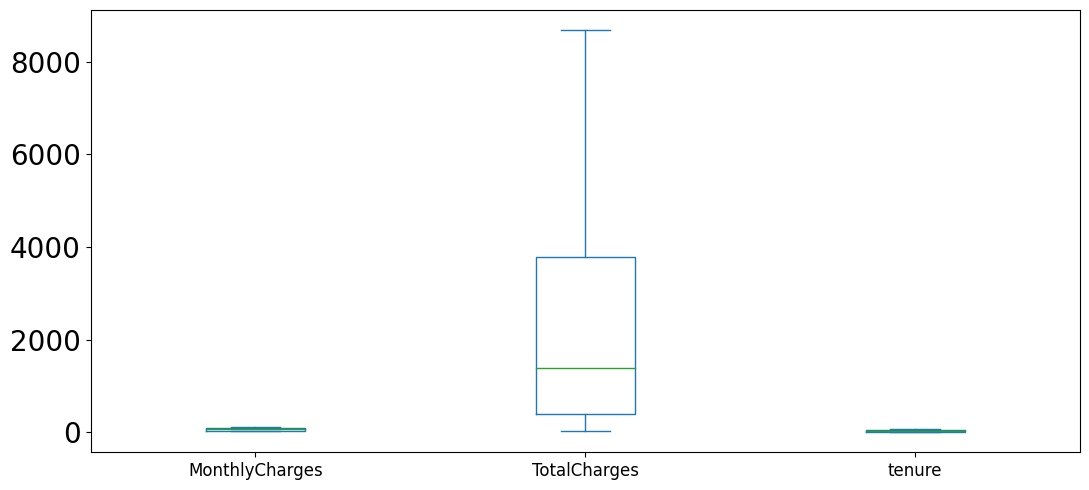

In [261]:
# Visualizacion de outliers

plt.rcParams["figure.figsize"] = [30, 30]
plt.rcParams["figure.autolayout"] = True

ax = num_col[['MonthlyCharges','TotalCharges', 'tenure']].plot(kind='box', figsize=(11, 5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=20)

plt.show()

Analizamos la correlación entre variables numéricas.

In [262]:
correlation = num_col.corr(method='pearson')
correlation

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.253684,0.828316
MonthlyCharges,0.253684,1.000000,0.652475
TotalCharges,0.828316,0.652475,1.000000


Podemos observar que TotalCharges tiene una alta correlación con tenure y MonthlyCharges, por lo que este feature es inecesario para el modelo.

In [263]:
df_raw.drop(['TotalCharges'],axis=1, inplace= True)

Finalmente guardamos el dataframe pre-procesado para ser reutilizado en las siguientes etapas.

In [264]:
df_raw.to_csv('../data/preprocessed/churn_preprocessed.csv')